Sentiment Analyzer using web scrapping

My Twitter account is used to crawl the tweets.

In [ ]:
# Importing tweepy, matplotlib, pandas, textblob, nltk, re and some needed packages

import tweepy,re
from textblob import TextBlob
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:

# My Twitter handles
consumer_key = 'pOwnCfdC1o0EIeT1kXKUmpIDR'
consumer_secret = 'SebeXbBQpmFEUnudNZdI8zO3W5rj1Wqrklzsl8T7W9p0WsPmMY'
access_key = '1351916717363011585-GdjOF8y7ywUE3UOHuhKP3VP7kdtXgw'
access_secret = 'z2Op6P3I6J4Imi6bwiXap4yAkq9g5sW2JoDDC5nLayEI5'

# Function to extract tweets
def get_tweets(username, NoOfTerms):

        # Authorization to consumer key and consumer secret
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)

        # Calling api
        api = tweepy.API(auth)

        # Number of tweets to be extracted
        number_of_tweets = int(NoOfTerms)

        tweets = tweepy.Cursor(api.search,
              q=username+" -filter:retweets",
              lang="en").items(number_of_tweets)


        tweet_list = [tweet.text for tweet in tweets]

        tweet_df = pd.DataFrame(tweet_list)
        tweet_df = tweet_df.drop_duplicates()

        print(tweet_df)

        return tweet_df


In [ ]:
# Driver code
if __name__ == '__main__':

    # User input, ex: India, 100
    searchTerm = input("Enter the search term or tag to search in Twitter:  ")
    NoOfTerms1 = input("Number of search terms you need:  ")
    stweets = get_tweets(searchTerm, NoOfTerms1)

Enter the search term or tag to search in Twitter:  india
Number of search terms you need:  100
                                                    0
0   India's GSAT-24 satellite launched, entire cap...
1   @Taehyung_india_ @BTS_twt VxCELINE \nKIM TAEHY...
2   Just found out i could change all the casual r...
3   "The economic impact of the #Ukraine war and t...
4   Absolutely correct during last 8 years itis fo...
..                                                ...
95  @CharkopWarriors @mybmc @mybmcWardPN @MCGMCons...
96  It’s mostly #Biden’s fault 😂. Countries w/ rec...
97  #OTD #WTCFinal \n\nNew Zealand ended their 21-...
98  @nitinwalvekar Hey there! Thank you for follow...
99  India and China may be buying more Russian oil...

[100 rows x 1 columns]


In [ ]:
stweets.head()

,0
0,"India's GSAT-24 satellite launched, entire cap..."
1,@Taehyung_india_ @BTS_twt VxCELINE \nKIM TAEHY...
2,Just found out i could change all the casual r...
3,"""The economic impact of the #Ukraine war and t..."
4,Absolutely correct during last 8 years itis fo...


In [ ]:
# Removing usernames
tweet_df = stweets
def clean_data(text):
    return ' '.join(re.sub("(@[a-zA-Z0-9]+)|([^0-9A-Za-z])|(https://[\w.]+/[\w]+)", " ", text).split())

tweet_df['cleaned_data'] = tweet_df[0].apply(clean_data)

In [ ]:
tweet_df.head()

,0,cleaned_data
0,@nitinwalvekar Hey there! Thank you for follow...,Hey there Thank you for following us We are gl...
1,India and China may be buying more Russian oil...,India and China may be buying more Russian oil...
2,@mrjamesob It’s mostly #Biden’s fault 😂. Count...,It s mostly Biden s fault Countries w record h...
3,The Aluminium alloys of 7000 series have the h...,The Aluminium alloys of 7000 series have the h...
4,@Bhatk2014 @_vksingh_ @pLastHuman @ndtv @BJP4I...,vksingh As for China we don t need lessons fro...


In [ ]:
# Dropping initial numbers
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ''.join(list_text_new)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(drop_numbers)
tweet_df.head()

,0,cleaned_data
0,"India's GSAT-24 satellite launched, entire cap...",India s GSAT satellite launched entire capaci...
1,@Taehyung_india_ @BTS_twt VxCELINE \nKIM TAEHY...,india twt VxCELINE KIM TAEHYUNG for CELINE Lis...
2,Just found out i could change all the casual r...,Just found out i could change all the casual r...
3,"""The economic impact of the #Ukraine war and t...",The economic impact of the Ukraine war and the...
4,Absolutely correct during last 8 years itis fo...,Absolutely correct during last years itis fou...


In [ ]:
# changing all the words of the reviews column to lowercase letters
def lower_case(text):
    text_words = word_tokenize(text)
    text_words_lower = [x.lower() for x in text_words]
    return ' '.join(text_words_lower)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lower_case)
tweet_df['cleaned_data'].values

array(['india s gsat satellite launched entire capacity leased to tata play',
       'india twt vxceline kim taehyung for celine listening to christmastree by v ost of the year',
       'just found out i could change all the casual references to india as a product line',
       'the economic impact of the ukraine war and the west led sanctions is showing across the world inflation is up i',
       'absolutely correct during last years itis found govt busy in forming government no development cry',
       'ut has boasted of giving cr from shiv sena fund for building the temple of blood in ayodhya he is secular wi',
       'yoga an idea of pm modi that is now a global phenomenon via namo app',
       'we welcome lakshmi prasanna director regulatory affairs at as expert panelist on india uae cepa expl',
       'saab g saab follow me follow back',
       'the result of many propaganda cause economic problems guaranteed job proposals no hardwork armed forces to be m',
       'u mean it was 

In [ ]:
#Lematize the words        Ex:  good, better has the same root
lemmatizer = WordNetLemmatizer()
def lemmatise(text):
    text_tokens = word_tokenize(text)
    text_lemm = [lemmatizer.lemmatize(word) for word in text_tokens]
    return ' '.join(text_lemm)

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(lemmatise)
tweet_df['cleaned_data'].values

array(['india s gsat satellite launched entire capacity leased to tata play',
       'india twt vxceline kim taehyung for celine listening to christmastree by v ost of the year',
       'just found out i could change all the casual reference to india a a product line',
       'the economic impact of the ukraine war and the west led sanction is showing across the world inflation is up i',
       'absolutely correct during last year itis found govt busy in forming government no development cry',
       'ut ha boasted of giving cr from shiv sena fund for building the temple of blood in ayodhya he is secular wi',
       'yoga an idea of pm modi that is now a global phenomenon via namo app',
       'we welcome lakshmi prasanna director regulatory affair at a expert panelist on india uae cepa expl',
       'saab g saab follow me follow back',
       'the result of many propaganda cause economic problem guaranteed job proposal no hardwork armed force to be m',
       'u mean it wa sanctioned 

In [ ]:
# Remove stop words like the, is etc. Download pack from nltk like above
def remove_stopword(text):
    text_tokens = word_tokenize(text)
    tokens = [word for word in text_tokens if not word in set(stopwords.words('english'))]
    tokens_text = ' '.join(tokens)
    return tokens_text

tweet_df['cleaned_data'] = tweet_df['cleaned_data'].apply(remove_stopword)
tweet_df['cleaned_data'].values

array(['india gsat satellite launched entire capacity leased tata play',
       'india twt vxceline kim taehyung celine listening christmastree v ost year',
       'found could change casual reference india product line',
       'economic impact ukraine war west led sanction showing across world inflation',
       'absolutely correct last year itis found govt busy forming government development cry',
       'ut ha boasted giving cr shiv sena fund building temple blood ayodhya secular wi',
       'yoga idea pm modi global phenomenon via namo app',
       'welcome lakshmi prasanna director regulatory affair expert panelist india uae cepa expl',
       'saab g saab follow follow back',
       'result many propaganda cause economic problem guaranteed job proposal hardwork armed force',
       'u mean wa sanctioned british',
       'subsidy expensive amp add big hole fiscal open ended indonesia ha add su',
       'mh exactly entire strength matoshree gone',
       'personally want india win

In [ ]:
# Lets calculate the Polarity of the Reviews Polarity is an expression that determines the expression of an opinion, 1-'+ve',0-Nuet, -1-'-ve'
def get_polarity(text):
    textblob = TextBlob(str(text))
    pol = textblob.sentiment.polarity
    if(pol==0):
        return "Neutral"
    elif(pol>0 and pol<=0.3):
        return "Weakly Positive"
    elif(pol>0.3 and pol<=0.6):
        return "Positive"
    elif(pol>0.6 and pol<=1):
        return "Strongly Positive"
    elif(pol>-0.3 and pol<=0):
        return "Weakly Negative"
    elif(pol>-0.6 and pol<=-0.3):
        return "Negative"
    elif(pol>-1 and pol<=-0.6):
        return "Strongly Negative"

tweet_df['polarity'] = tweet_df['cleaned_data'].apply(get_polarity)
tweet_df['polarity'].value_counts()

Neutral              46
Positive             20
Weakly Positive      18
Weakly Negative      11
Strongly Positive     3
Negative              2
Name: polarity, dtype: int64

In [ ]:
neutral = 0
wpositive = 0
spositive = 0
positive = 0
negative = 0
wnegative = 0
snegative = 0
polarity = 0

for i in range(0,70):
    textblob = TextBlob(str(tweet_df['cleaned_data'][i]))
    polarity+= textblob.sentiment.polarity
    pol = textblob.sentiment.polarity
    if (pol == 0):  # adding reaction of how people are reacting to find average later
        neutral += 1
    elif (pol > 0 and pol <= 0.3):
        wpositive += 1
    elif (pol > 0.3 and pol <= 0.6):
        positive += 1
    elif (pol > 0.6 and pol <= 1):
        spositive += 1
    elif (pol > -0.3 and pol <= 0):
        wnegative += 1
    elif (pol > -0.6 and pol <= -0.3):
        negative += 1
    elif (pol > -1 and pol <= -0.6):
        snegative += 1


# finding average reaction
polarity = polarity / int(NoOfTerms1)
polarity

0.08072819264069266

In [ ]:
def percentage(part, whole):
    temp = 100 * float(part) / float(whole)
    return format(temp, '.2f')

# finding average of how people are reacting
positive = percentage(positive, NoOfTerms1)
wpositive = percentage(wpositive, NoOfTerms1)
spositive = percentage(spositive, NoOfTerms1)
negative = percentage(negative, NoOfTerms1)
wnegative = percentage(wnegative, NoOfTerms1)
snegative = percentage(snegative, NoOfTerms1)
neutral = percentage(neutral, NoOfTerms1)

 # printing out data
print("How people are reacting on " + searchTerm + " by analyzing " + str(NoOfTerms1) + " tweets.")
print()
print("-----------------------------------------------------------------------------------------")
print()
print("General Report: ")

if (polarity == 0):
    print("Neutral")
elif (polarity > 0 and polarity <= 0.3):
    print("Weakly Positive")
elif (polarity > 0.3 and polarity <= 0.6):
    print("Positive")
elif (polarity > 0.6 and polarity <= 1):
    print("Strongly Positive")
elif (polarity > -0.3 and polarity <= 0):
    print("Weakly Negative")
elif (polarity > -0.6 and polarity <= -0.3):
    print("Negative")
elif (polarity > -1 and polarity <= -0.6):
    print("Strongly Negative")

print()
print("------------------------------------------------------------------------------------------")
print()
print("Detailed Report: ")
print(str(positive) + "% people thought it was positive")
print(str(wpositive) + "% people thought it was weakly positive")
print(str(spositive) + "% people thought it was strongly positive")
print(str(negative) + "% people thought it was negative")
print(str(wnegative) + "% people thought it was weakly negative")
print(str(snegative) + "% people thought it was strongly negative")
print(str(neutral) + "% people thought it was neutral")

How people are reacting on india by analyzing 100 tweets.

-----------------------------------------------------------------------------------------

General Report: 
Weakly Positive

------------------------------------------------------------------------------------------

Detailed Report: 
15.00% people thought it was positive
13.00% people thought it was weakly positive
2.00% people thought it was strongly positive
2.00% people thought it was negative
10.00% people thought it was weakly negative
0.00% people thought it was strongly negative
28.00% people thought it was neutral


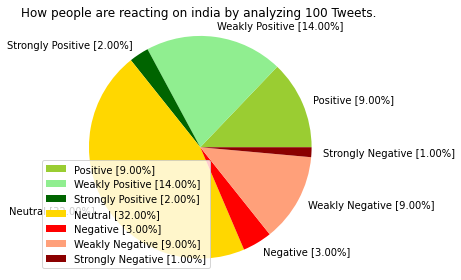

In [ ]:
# Let's see the Pie chart
sizes = [positive, wpositive, spositive, neutral, negative, wnegative, snegative]
colors = ['yellowgreen','lightgreen','darkgreen', 'gold', 'red','lightsalmon','darkred']
labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wpositive) + '%]',
          'Strongly Positive [' + str(spositive) + '%]', 'Neutral [' + str(neutral) + '%]',
          'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wnegative) + '%]',
          'Strongly Negative [' + str(snegative) + '%]']

plt.pie(sizes, labels = labels, colors = colors)
plt.legend(labels, loc="best")
plt.title('How people are reacting on ' + searchTerm + ' by analyzing ' + str(NoOfTerms1) + ' Tweets.')
plt.axis('equal')
plt.tight_layout()
plt.show()